# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import joblib

# IMPORTING DATASET

In [43]:
dataset=pd.read_csv("datasets_255305_536206_fuelconsumption.csv")
dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# DROPPING UNWANTED COLUMNS

In [3]:
dataset.drop(["MODEL","VEHICLECLASS","TRANSMISSION","MAKE","MODELYEAR","FUELCONSUMPTION_COMB"],axis=1,inplace=True)
dataset

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,33,196
1,2.4,4,Z,11.2,7.7,29,221
2,1.5,4,Z,6.0,5.8,48,136
3,3.5,6,Z,12.7,9.1,25,255
4,3.5,6,Z,12.1,8.7,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,X,13.4,9.8,24,271
1063,3.2,6,X,13.2,9.5,25,264
1064,3.0,6,X,13.4,9.8,24,271
1065,3.2,6,X,12.9,9.3,25,260


In [4]:
dataset.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,60.000000,488.000000


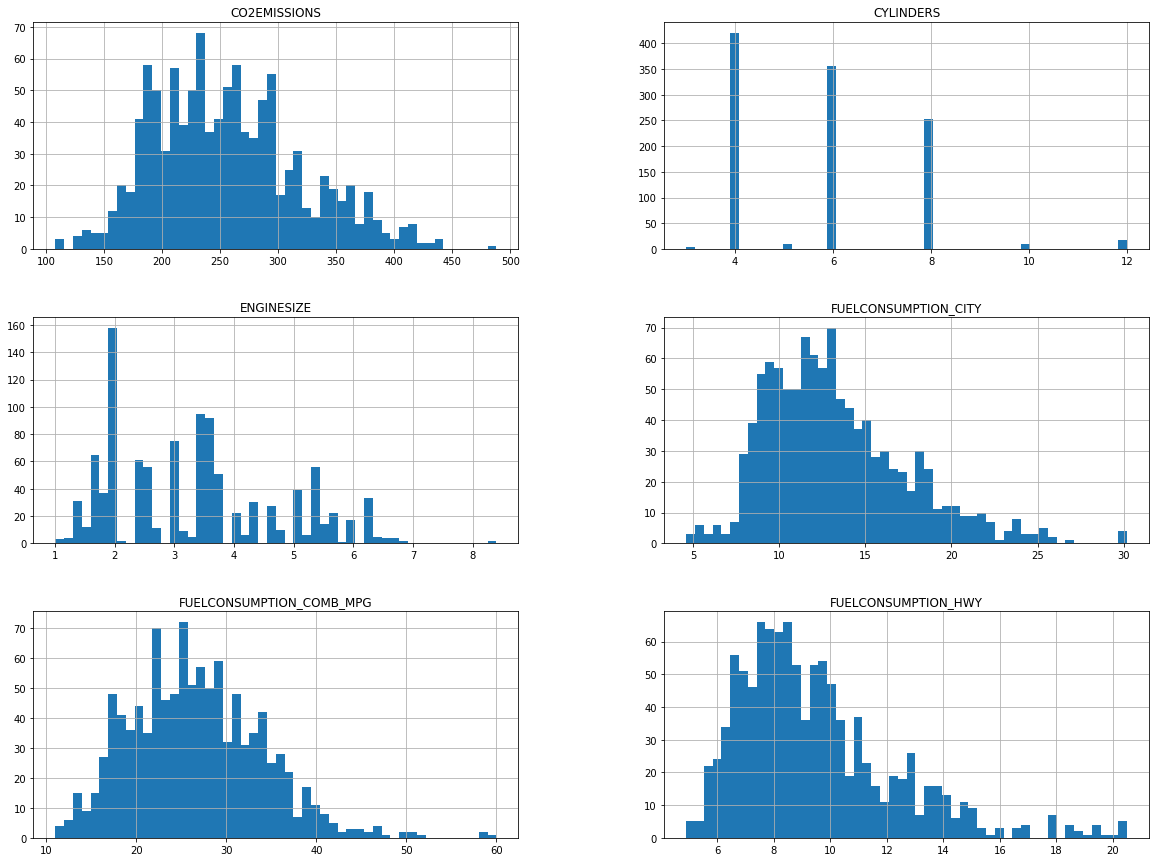

In [5]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

# CHECKING CORRELATION

In [6]:
dataset.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,-0.893809,0.861748
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,-0.906394,1.000000


# DATA VISUALIZATION

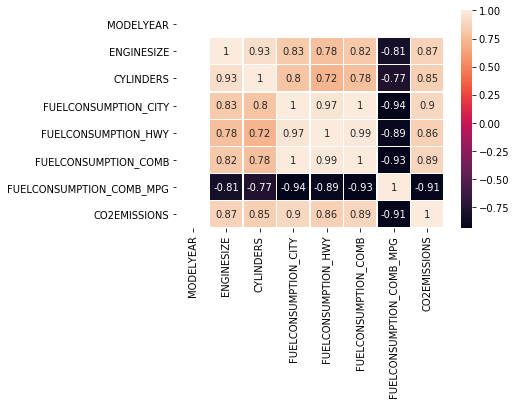

In [47]:
import seaborn as sns
sns.heatmap(dataset.corr(),linewidths=0.1,annot=True)

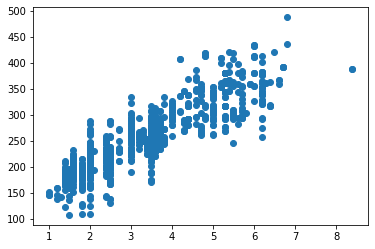

In [8]:
plt.scatter(dataset['ENGINESIZE'],dataset["CO2EMISSIONS"])

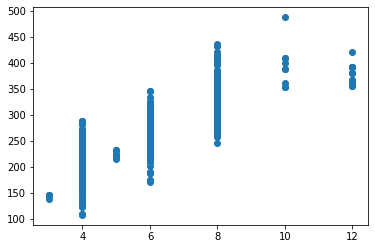

In [9]:
plt.scatter(dataset['CYLINDERS'],dataset["CO2EMISSIONS"])

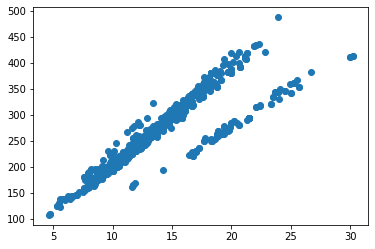

In [10]:
plt.scatter(dataset['FUELCONSUMPTION_CITY'],dataset["CO2EMISSIONS"])

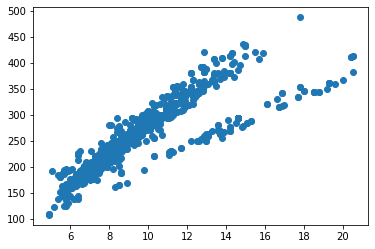

In [11]:
plt.scatter(dataset['FUELCONSUMPTION_HWY'],dataset["CO2EMISSIONS"])

In [12]:
#plt.scatter(dataset['FUELCONSUMPTION_COMB'],dataset["CO2EMISSIONS"])

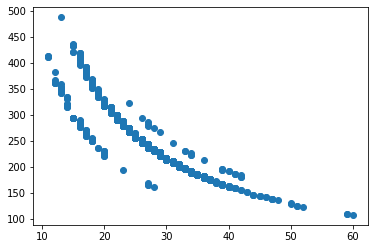

In [13]:
plt.scatter(dataset['FUELCONSUMPTION_COMB_MPG'],dataset["CO2EMISSIONS"])

# CHECKING NULL VALUES

In [14]:
dataset.isnull().any()

ENGINESIZE                  False
CYLINDERS                   False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

# LABEL ENCODING

In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset.iloc[:,2] = lb.fit_transform(dataset.iloc[:,2])
dataset

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,3,9.9,6.7,33,196
1,2.4,4,3,11.2,7.7,29,221
2,1.5,4,3,6.0,5.8,48,136
3,3.5,6,3,12.7,9.1,25,255
4,3.5,6,3,12.1,8.7,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,2,13.4,9.8,24,271
1063,3.2,6,2,13.2,9.5,25,264
1064,3.0,6,2,13.4,9.8,24,271
1065,3.2,6,2,12.9,9.3,25,260


# Removing Outliers

In [16]:
z=np.abs(stats.zscore(dataset))
z

array([[0.9512918 , 0.99896853, 1.01114784, ..., 0.99334135, 0.87855306,
        0.95084   ],
       [0.66865251, 0.99896853, 1.01114784, ..., 0.63532912, 0.34273362,
        0.55616091],
       [1.30459092, 0.99896853, 1.01114784, ..., 1.31555236, 2.88787597,
        1.89806981],
       ...,
       [0.24469358, 0.11424235, 0.37382616, ..., 0.11649658, 0.32704069,
        0.23319727],
       [0.10337393, 0.11424235, 0.37382616, ..., 0.06250954, 0.19308583,
        0.05953847],
       [0.10337393, 0.11424235, 0.37382616, ..., 0.25970147, 0.59495041,
        0.59630203]])

In [17]:
threshold=3
np.where(z>=threshold)

(array([  12,   13,   18,   27,   29,   32,   35,   36,   41,   43,   69,
          71,   73,   74,   79,   80,  100,  112,  182,  201,  214,  216,
         218,  220,  222,  225,  225,  228,  228,  344,  346,  348,  349,
         351,  351,  362,  415,  438,  440,  442,  444,  446,  449,  449,
         452,  452,  476,  487,  585,  633,  655,  687,  739,  756,  760,
         764,  892,  913,  916,  922,  923,  924,  925,  926,  927,  928,
         940,  941,  970,  987,  988,  989, 1024, 1025, 1032, 1033, 1040,
        1041, 1042, 1048, 1049, 1055], dtype=int64),
 array([1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 4,
        4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 6, 3, 4, 4, 5, 4, 4, 4, 4, 4, 3, 4,
        3, 4, 3, 5, 2, 1, 5, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2], dtype=int64))

In [18]:
dataset=dataset[(z<=3).all(axis=1)]
dataset

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,3,9.9,6.7,33,196
1,2.4,4,3,11.2,7.7,29,221
2,1.5,4,3,6.0,5.8,48,136
3,3.5,6,3,12.7,9.1,25,255
4,3.5,6,3,12.1,8.7,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,2,13.4,9.8,24,271
1063,3.2,6,2,13.2,9.5,25,264
1064,3.0,6,2,13.4,9.8,24,271
1065,3.2,6,2,12.9,9.3,25,260


# SEPARATING DEPENDENT AND INDEPENDENT VARIABLES

In [19]:
x = dataset.iloc[:,0:6].values
x

array([[ 2. ,  4. ,  3. ,  9.9,  6.7, 33. ],
       [ 2.4,  4. ,  3. , 11.2,  7.7, 29. ],
       [ 1.5,  4. ,  3. ,  6. ,  5.8, 48. ],
       ...,
       [ 3. ,  6. ,  2. , 13.4,  9.8, 24. ],
       [ 3.2,  6. ,  2. , 12.9,  9.3, 25. ],
       [ 3.2,  6. ,  2. , 14.9, 10.2, 22. ]])

In [20]:
y = dataset.iloc[:,-1].values
y

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212, 225, 239, 338,
       354, 338, 354, 202, 230, 214, 230, 230, 214, 235, 251, 258, 258,
       260, 258, 288, 242, 239, 258, 212, 304, 336, 407, 354, 409, 336,
       407, 354, 409, 306, 308, 290, 262, 285, 262, 285, 267, 281, 281,
       297, 292, 209, 209, 237, 237, 297, 320, 322, 437, 193, 200, 202,
       193, 200, 209, 209, 209, 221, 230, 228, 237, 232, 193, 200, 209,
       221, 230, 228, 237, 202, 209, 232, 246, 281, 292, 232, 292, 281,
       292, 246, 292, 292, 191, 214, 212, 292, 292, 338, 317, 338, 317,
       338, 317, 338, 317, 209, 260, 230, 253, 255, 320, 370, 274, 324,
       209, 200, 278, 253, 278, 283, 290, 196, 212, 264, 250, 264, 264,
       189, 228, 225, 246, 189, 228, 225, 218, 221, 235, 207, 251, 232,
       260, 258, 262, 232, 248, 248, 260, 294, 253, 260, 255, 262, 382,
       340, 382, 340, 382, 340, 338, 322, 377, 283, 294, 262, 271, 290,
       258, 269, 242, 294, 292, 382, 340, 276, 258, 179, 179, 20

# FEATURE SCALING

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-9.48760523e-01, -1.03662186e+00,  1.07543659e+00,
        -8.86413603e-01, -1.09350471e+00,  9.71535422e-01],
       [-6.49771850e-01, -1.03662186e+00,  1.07543659e+00,
        -5.20709385e-01, -6.72958649e-01,  3.74038874e-01],
       [-1.32249636e+00, -1.03662186e+00,  1.07543659e+00,
        -1.98352626e+00, -1.47199616e+00,  3.21214748e+00],
       ...,
       [-2.01288839e-01,  2.11105363e-01, -5.72678309e-01,
         9.81746754e-02,  2.10188069e-01, -3.72831811e-01],
       [-5.17945025e-02,  2.11105363e-01, -5.72678309e-01,
        -4.24807930e-02, -8.49587993e-05, -2.23457674e-01],
       [-5.17945025e-02,  2.11105363e-01, -5.72678309e-01,
         5.20141080e-01,  3.78406492e-01, -6.71580084e-01]])

In [22]:
joblib.dump(sc,'onehot')

['onehot']

# SPLITTING DATA INTO TRAIN AND TEST

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train.shape

(693, 6)

In [25]:
x_test.shape

(297, 6)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,criterion="mae",random_state=0)
rf.fit(x_train,y_train)
joblib.dump(rf,'multi.save')

['multi.save']

In [27]:
y_pred=rf.predict(x_test)
y_pred

array([191.   , 296.09 , 250.26 , 196.28 , 261.57 , 257.84 , 249.4  ,
       259.27 , 240.62 , 208.66 , 209.06 , 167.275, 248.54 , 209.06 ,
       272.1  , 338.88 , 172.945, 232.14 , 251.21 , 232.61 , 224.84 ,
       380.04 , 294.87 , 286.2  , 297.8  , 229.17 , 203.23 , 209.14 ,
       317.03 , 279.29 , 250.95 , 408.09 , 216.36 , 340.89 , 291.63 ,
       280.14 , 209.4  , 190.9  , 166.64 , 311.42 , 420.55 , 271.64 ,
       260.43 , 207.07 , 215.84 , 189.46 , 378.55 , 202.06 , 207.31 ,
       273.875, 223.86 , 197.   , 179.03 , 319.1  , 270.135, 336.85 ,
       234.15 , 229.17 , 173.165, 283.09 , 252.04 , 223.35 , 221.3  ,
       324.32 , 319.37 , 313.61 , 181.79 , 174.43 , 263.   , 308.39 ,
       208.94 , 292.1  , 341.33 , 378.31 , 208.07 , 282.6  , 269.43 ,
       294.68 , 196.4  , 268.87 , 246.44 , 327.93 , 201.38 , 283.06 ,
       196.3  , 380.04 , 148.9  , 223.91 , 294.35 , 191.96 , 238.5  ,
       246.44 , 172.82 , 306.89 , 161.86 , 211.04 , 190.84 , 144.93 ,
       363.31 , 318.

In [28]:
y_test

array([191, 297, 250, 196, 262, 258, 246, 258, 242, 209, 209, 166, 248,
       209, 271, 338, 172, 232, 251, 235, 222, 380, 301, 288, 301, 230,
       202, 209, 317, 283, 251, 419, 218, 340, 290, 283, 212, 189, 168,
       313, 421, 271, 259, 207, 216, 189, 380, 205, 207, 276, 225, 196,
       179, 320, 271, 338, 235, 230, 170, 283, 251, 225, 221, 324, 322,
       315, 182, 175, 264, 308, 212, 290, 345, 377, 209, 283, 271, 301,
       196, 267, 246, 342, 200, 283, 196, 380, 152, 223, 294, 193, 237,
       246, 170, 304, 161, 212, 189, 145, 356, 317, 356, 237, 170, 184,
       198, 168, 221, 322, 271, 260, 198, 216, 396, 177, 239, 251, 172,
       244, 317, 301, 191, 163, 228, 258, 304, 175, 168, 267, 290, 179,
       317, 191, 159, 294, 310, 221, 179, 186, 209, 336, 414, 239, 306,
       184, 196, 294, 242, 260, 237, 242, 432, 239, 294, 373, 179, 228,
       267, 281, 342, 214, 262, 288, 308, 262, 277, 292, 175, 258, 196,
       256, 354, 276, 230, 265, 184, 285, 214, 297, 229, 198, 23

In [29]:
#Checking Accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

99.82540677929056

In [30]:
def seize(ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG):
    CO2EMISSIONS=rf.predict(sc.transform([[ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG]]))
    print(CO2EMISSIONS)

In [31]:
seize(1.1,1.1,1.1,1.1,1.1,1.1)

[245.05]
